# 予選結果の分析

In [1]:
import glob
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.metrics import confusion_matrix, accuracy_score

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

# 予選結果のプロット

In [2]:
impression_results = {
    'MIYAMA': [5.82352941176471,	4.94117647058824,	5.64705882352941,	6.11764705882353,	5.70588235294118,	6.11764705882353,	6.23529411764706,	6.52941176470588,	5.23529411764706],
    'ROS': [5.2,	4.75,	5.15,	5.35,	5.2,	5.1,	5.35,	5.9,	4.35],
    'A': [5.0952380952381,	4.33333333333333,	4.42857142857143,	4.90476190476191,	5,	4.95238095238095,	5.57142857142857,	5.42857142857143,	4.90476190476191],
    'JERRY_cis': [4.5,	3.42857142857143,	4.57142857142857,	4.71428571428571,	4.07142857142857,	4.78571428571429,	4.92857142857143,	4.78571428571429,	4.5],
    'SB': [4.37037037037037,	3.77777777777778,	4.40740740740741,	4.14814814814815,	4.2962962962963	,4.33333333333333	,4.81481481481482,	5.25925925925926,	4.2962962962963],
    'B': [4.36842105263158,	4.05263157894737	,4.15789473684211	,4.42105263157895,	3.89473684210526	,4.15789473684211	,5	,5	,3.84210526315789],
    'baseline': [4.185,	3.59,	4.29,	4.335,	4.035,	4.455,	4.78,	5.065,	3.945],
    'C': [4.30434782608696	,3.73913043478261,	4.04347826086957,	4.43478260869565	,3.91304347826087,	4.30434782608696,	4.47826086956522,	5.26086956521739	,4],
    'D': [4.23529411764706,	3.41176470588235,	4.47058823529412	,4.52941176470588,	3.82352941176471,	4.52941176470588,	4.23529411764706	,5	,3.17647058823529],
    'E': [4.26666666666667,	2.66666666666667	,4.06666666666667,	4.4	,3.93333333333333	,3.8,	4	,5.6	,3.8],
    'F': [3.75,	3.33333333333333,	3.75,	3.33333333333333	,3.08333333333333	,3.33333333333333,	3.66666666666667	,3.83333333333333,	2.91666666666667],
    'G': [3.1875,	2.9375,	3.25,	3.5	,3.4375,	3.1875	,3.6875,	4,3.3125],
    'H': [2.77777777777778	,2.44444444444444	,2.66666666666667,	3	,2.55555555555556,	2.83333333333333,	2.77777777777778	,3.27777777777778	,2.72222222222222]
}

average = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]).astype(float)
for team, result in impression_results.items():
    if team == 'baseline' or team == 'ROS': 
        continue
    average += np.array(result)
average /= len(impression_results) - 2
average = np.round(average, 2)
print(average)

top = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]).astype(float)
for team, result in impression_results.items():
    if team == 'MIYAMA' or  team == 'JERRY_cis' or team == 'SB': 
        top += np.array(result)
top /= 3
print(top)

[4.24 3.55 4.13 4.32 3.97 4.21 4.49 4.91 3.88]
[4.89796659 4.04917523 4.87529827 4.99336031 4.69120241 5.07889823
 5.32622679 5.5247951  4.6771968 ]


([<matplotlib.axis.XTick at 0x7febe04a89d0>,
 [Text(1, 0, '情報の十分さ'),
  Text(2, 0, '対話の自然さ'),
  Text(3, 0, '対話の適切さ'),
  Text(4, 0, '対話の好ましさ'),
  Text(5, 0, '対話の満足度'),
  Text(6, 0, 'ロボットの信頼度'),
  Text(7, 0, '情報の参考度'),
  Text(8, 0, '提供された情報の信頼性'),
  Text(9, 0, '再来店したい度合い')])

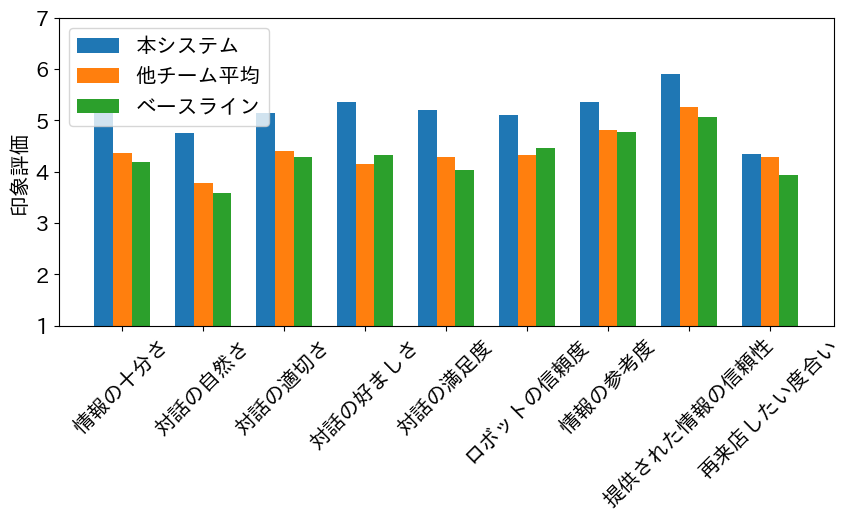

In [3]:
plt.rcParams["font.size"] = 15
# 棒の配置位置、ラベルを用意
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
labels = ["情報の十分さ", "対話の自然さ", "対話の適切さ", "対話の好ましさ", "対話の満足度", "ロボットの信頼度", "情報の参考度", "提供された情報の信頼性", "再来店したい度合い"]
 
# 各系列のデータを用意
ROS = np.array(impression_results['ROS'])
baseline = np.array(impression_results['baseline']) 
average = np.array(impression_results['SB'])

data = [ROS, average, baseline]
teams = ['本システム', '他チーム平均', 'ベースライン']

# ros = [impression_results['ROS'][0], ]
 
# マージンを設定
margin = 0.3  #0 <margin< 1
totoal_width = 1 - margin
plt.figure(figsize=(10, 4))
# 棒グラフをプロット
for i, h in enumerate(data):
  pos = x - totoal_width *( 1- (2*i+1)/len(data) )/2
  plt.bar(pos, h, width = totoal_width/len(data), label=teams[i])
 
# ラベルの設定
plt.legend()
plt.ylim(1, 7)
plt.ylabel("印象評価")
plt.xticks(x, labels, rotation=45)

([<matplotlib.axis.XTick at 0x7febdfc27f40>,
 [Text(1, 0, '対話の自然さ'), Text(2, 0, '対話の満足度')])

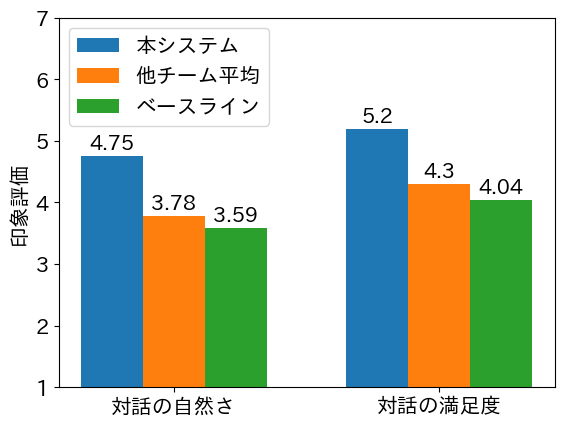

In [4]:
plt.rcParams["font.size"] = 15
# 棒の配置位置、ラベルを用意
x = np.array([1, 2])
labels = ["対話の自然さ", "対話の満足度"]

def add_value_label(x_list, y_list):
    for i in range(len(x_list)):
      y = round(y_list[i], 2)
      plt.text(x_list[i], y_list[i]+0.1, y, ha="center")
 
# 各系列のデータを用意
ROS = np.array(impression_results['ROS'])[[1, 4]]
baseline = np.array(impression_results['baseline'])[[1, 4]]
ave = np.array(average)[[1, 4]]

data = [ROS, ave, baseline]
teams = ['本システム', '他チーム平均', 'ベースライン']

# ros = [impression_results['ROS'][0], ]
 
# マージンを設定
margin = 0.3  #0 <margin< 1
totoal_width = 1 - margin
# 棒グラフをプロット
for i, h in enumerate(data):
  pos = x - totoal_width *( 1- (2*i+1)/len(data) )/2
  add_value_label(pos, h)
  plt.bar(pos, h, width = totoal_width/len(data), label=teams[i])
 
# ラベルの設定
plt.legend(loc="upper left")
plt.ylim(1, 7)
plt.ylabel("印象評価")
plt.xticks(x, labels)

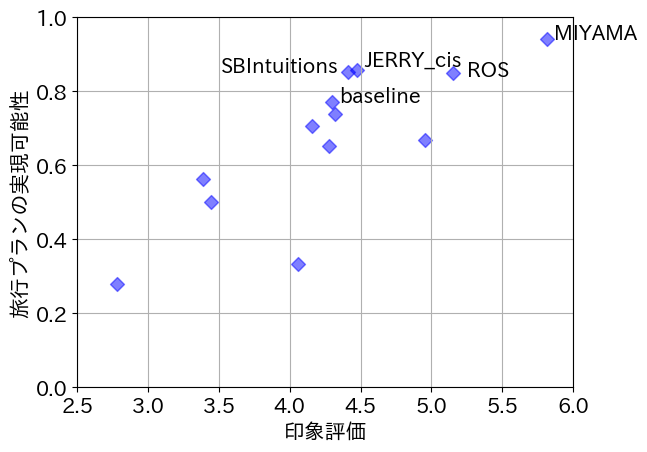

In [5]:
# データ準備
impression = np.array([5.81699, 5.15, 4.95767, 4.47619, 4.41152, 4.32164, 4.29778, 4.27536, 4.15686, 4.05926, 3.44444, 3.38889, 2.78395]) 
plan = np.array([0.94118, 0.85, 0.66667, 0.85714, 0.85185, 0.73684, 0.77, 0.65217, 0.70588, 0.33333, 0.5, 0.5625, 0.27778]) # (2)売上の格納
 
# グラフの装飾
plt.xlim(2.5, 6) # (3)x軸の表示範囲
plt.ylim(0, 1) # (4)y軸の表示範囲
plt.xlabel("印象評価") # (6)x軸ラベル
plt.ylabel("旅行プランの実現可能性") # (7)y軸ラベル
plt.grid(True) # (8)目盛線の表示
# plt.tick_params(labelsize = 12) # (9)目盛線のラベルサイズ
 
# グラフの描画
plt.scatter(impression, plan, s=50, c="b",
                      marker="D", alpha=0.5) #(10)散布図の描画

plt.annotate('MIYAMA', (impression[0]+0.05, plan[0]))
plt.annotate('ROS', (impression[1]+0.1, plan[1]-0.01))
plt.annotate('JERRY_cis', (impression[3]+0.05, plan[3]+0.01))
plt.annotate('SBIntuitions', (impression[4]-0.9, plan[4]))
plt.annotate('baseline', (impression[6]+0.05, plan[6]))
plt.show()

In [ ]:
'''
fleiss kappa値を計算するプログラム
'''

def compute_fleiss_kappa(rate_list: list, n: int) -> float:
    '''
    与えられた集計結果に対してのfleiss kappa値を返す関数

    Parameters
    ----------
    rate_list: list
      [size N * k: N = 評価対象の総数, k = 評価のカテゴリー数]
    n: int
      評価者の数

    Return
    ----------
    kappa: float
      fleiss kappa値
    '''
    N = len(rate_list)
    k = len(rate_list[0])
    # 入力された情報の確認
    print('評価者の数 = {}'.format(n))
    print('評価対象の数 = {}'.format(N))
    print('評価カテゴリー数 = {}'.format(k))

    # Piの値を求めて，P_barを求める
    P_bar = sum([(sum([el**2 for el in row]) - n) / (n * (n - 1)) for row in rate_list]) / N
    print('P_bar  = {}'.format(P_bar))

    # pjの値を求めて，Pe_barを求める
    Pe_bar = sum([(sum([row[j] for row in rate_list]) / (N * n)) ** 2 for j in range(k)])
    print('Pe_bar  = {}'.format(Pe_bar))

    # fleiss kappa値の計算
    kappa = float(0)
    try:
        kappa = (P_bar - Pe_bar) / (1 - Pe_bar)
    except ZeroDivisionError:
        kappa = float(1)

    return kappa

files = glob.glob("*xlsx")

Label = []
Pred = []
Acc = []
test_list = []  # Fleiss' Kappa値用
TS_list = []
for file in files:
    user_id = file[4:13]
    df = pd.read_excel(file, index_col=0, usecols=[0, 1, 2, 5, 6, 7, 8, 9, 10])
    df.loc[:, 'TS'] = df.iloc[:, 5:8].mean(numeric_only=True, axis=1)

    def binarize_TS(ts):
        if ts >= 4:
            return 1 
        else:
            return 0

    def binarize_emotion(emotion):
        if emotion >= 0.5:
            return 1 
        else:
            return 0
    df['TS_binary'] = df['TS'].apply(binarize_TS)
    df['emotion_binary'] = df['emotion'].apply(binarize_emotion)
    
    label = []
    pred = []
    TS = []
    for _, row in df.iterrows():
        if row['speaker'] == 'S':
            continue
        tmp_list = [0, 0, 0, 0, 0, 0, 0]
        tmp_list[int(row['TS1']) -1] += 1
        tmp_list[int(row['TS2'])-1] += 1
        tmp_list[int(row['TS3'])-1] += 1
        label.append(row['TS_binary'])
        pred.append(row['emotion_binary'])
        Label.append(row['TS_binary'])
        Pred.append(row['emotion_binary'])
        test_list.append(tmp_list)
        # TS_list.append(row["TS"])
        TS.append(row['TS'])
    TS_list.extend(TS)
    print(f"user id :  {user_id}, ts average : {sum(TS) / len(TS)}")

    cm = confusion_matrix(label, pred)
    acc = round(accuracy_score(label, pred), 3)
    Acc.append(acc)
    # print("accuracy score : ", acc)
    display(df.head(12))
cm = confusion_matrix(Label, Pred)
acc = accuracy_score(Label, Pred)
# print(cm)
# print(acc)
# print(round(sum(Acc) / len(Acc), 3))
print("kappa = ", compute_fleiss_kappa(test_list, 3))

bins = [1, 2, 3, 4, 5, 6, 7]
n, bins, _ = plt.hist(TS_list, bins=bins)
xs = (bins[:-1] + bins[1:])/2 # 各柱の端が返るので1つずらして足して2で割ることで真ん中にする
ys = n
for x, y in zip(xs, ys):
    y = int(y)
    plt.text(x, y + 1, str(y), horizontalalignment="center")
plt.xlabel('TS')
plt.ylabel('number of data')
plt.show()

In [ ]:
yn1 = [5.67, 4.67, 4.33, 4.33, 4.67, 4.67, 4.67, 4.67, 4.67, 4.67, 4.0, 4.33, 2.33, 5.0, 3.0, 5.0, 3.33, 4.67, 4.67, 4.67]
wh1 = [4.67,4.67,4.67,5.00,4.67,4.67,5.0,4.67,5.0,4.0,4.0,4.67,4.33,4.67,4.67,5.0,4.67,4.67,4.67]
dig1 = [6.33,5.67,4.33,5.67,4.67,6.00,5.33,5.33,5.67,3.67,5.67,5.00,6.33,5.33,5.67,5.0,5.67,5.67]
yn2 = [4.33,5.0,4.67,4.67,5.0,5.0,4.67,5.0,4.67,4.67,5.0,5.0,5.0,4.33,4.67,3.33,4.67,4.67,5.0]
wh2 = [5.0,5.67,4.0,4.67,5.0,5.0,5.33,4.0,5.0,4.67,4.33,4.33,5.33,4.67,5.33,4.67,5.0]
dig2 = [5.33,6.33,5.0,4.67,5.00,6.0,5.0,5.67,4.0,5.0,4.67,4.67,4.00,4.67,4.33,4.67,2.67,4.67]

yn = yn1 + yn2
wh = wh1 + wh2 
dig = dig1 + dig2

print(sum(yn1) / len(yn1))
print(sum(wh1) / len(wh1))
print(sum(dig1) / len(dig1))
print(sum(yn2) / len(yn2))
print(sum(wh2) / len(wh2))
print(sum(dig2) / len(dig2))
print("======================")
print(sum(yn) / len(yn))
print(sum(wh) / len(wh))
print(sum(dig) / len(dig))

import statistics 
import math 

mean1 = statistics.mean(wh)
std1 = statistics.pstdev(wh)
nob1 = len(wh)
mean2 = statistics.mean(dig)
std2 = statistics.pstdev(dig)
nob2 = len(dig)
from scipy.stats import ttest_ind_from_stats 
ttest_ind_from_stats(mean1=mean1, std1=std1, nobs1=nob1, mean2=mean2, std2=std2, nobs2=nob2)

In [ ]:
# 対応のあるT検定
yn = [5.67,4.67,4.33,4.33,4.67,4.67,4.67,4.67,4.67,4.0,4.33,2.33,5.0,3.0,5.0,4.67,4.67,4.67, 4.33, 4.67,4.67,5.0,5.0,4.67,5.0,4.67,5.0,5.0,4.33,4.67,4.67,4.67,5.0]
wh = [4.67,4.67,4.67,5.00,4.67,4.67,5.0,4.67,5.0,4.0,4.67,4.33,4.67,4.67,5.0,4.67,4.67,4.67,5.67,4.0,4.67,5.0,5.0,5.33,4.0,5.0,4.33,4.33,5.33,4.67,5.33,4.67,5.0]
dig = [6.33,5.67,4.33,5.67,4.67,6.00,5.33,5.33,5.67,3.67,5.67,5.00,6.33,5.33,5.67,5.0,5.67,5.67,6.33,4.67,5.00,6.0,5.0,5.67,4.0,5.0,4.67,4.67,4.00,4.67,4.67,2.67,4.67]

yn = pd.Series(yn)
wh = pd.Series(wh)
dig = pd.Series(dig)


from scipy.stats import ttest_rel


print("yn : wh", ttest_rel(yn, wh))
print("yn : dig", ttest_rel(yn, dig))
print("wh : dig", ttest_rel(wh, dig))


In [ ]:
def timer(m, s):
    return m * 60 + s 

s = timer(8, 00)
s += timer(7, 19)
s += timer(8, 31)
s += timer(9, 37)
s += timer(8, 43)
s += timer(9, 3)
s += timer(7, 25)
s += timer(10, 30)
s += timer(6, 51)
s += timer(9, 36)
s += timer(9, 20)
s += timer(7, 43)
s += timer(10, 16)
s += timer(8, 17)
s += timer(10, 20)
s += timer(9, 38)
s += timer(8, 29)
s += timer(8, 15)
s += timer(10, 46)
s += timer(8, 30)
s /= 20 
s = int(s)
s

In [ ]:
ts = [3.93,4.78,4.65,4.09,4.43,4.64,4.24,4.51,4.19,4.63,4.96,4.51,4.77,4.10,4.98,4.94,4.47,4.35,4.22,4.71]
time = [timer(8, 0), timer(7, 19), timer(8, 31), timer(9, 37), timer(8, 43), timer(9, 3), timer(7, 25), timer(10, 30), timer(6, 51), timer(9, 36), timer(9, 20), timer(7, 43), timer(10, 16), timer(8, 17), timer(10, 20), timer(9, 38), timer(8, 29), timer(8, 15), timer(10, 46), timer(8, 30)]
from scipy import stats 
corr, p = stats.pearsonr(ts, time)
print(corr, p)